In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the data
train_data = pd.read_csv('../input/titanic/train.csv')
test_data = pd.read_csv('../input/titanic/test.csv')

# Display the first few rows of the training data
print("Training Data:")
print(train_data.head())

# Display the first few rows of the test data
print("\nTest Data:")
print(test_data.head())


Training Data:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   Na

# Exploratory Data Analysis (EDA)



Missing Values in Training Data:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing Values in Test Data:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


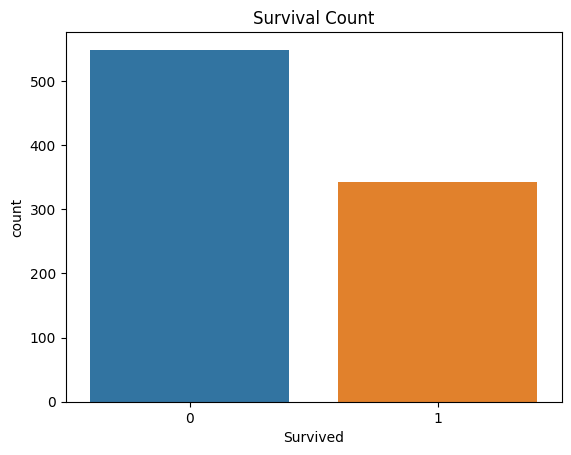

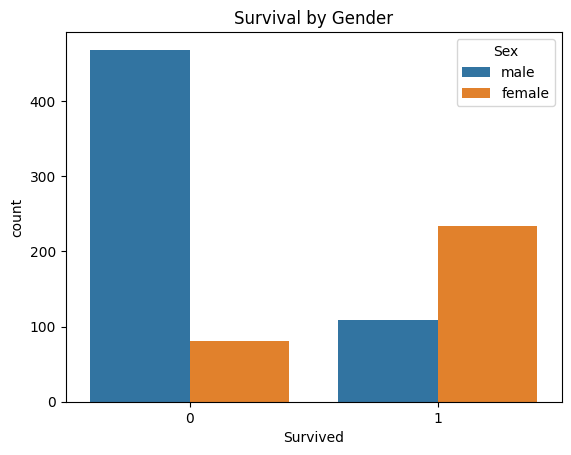

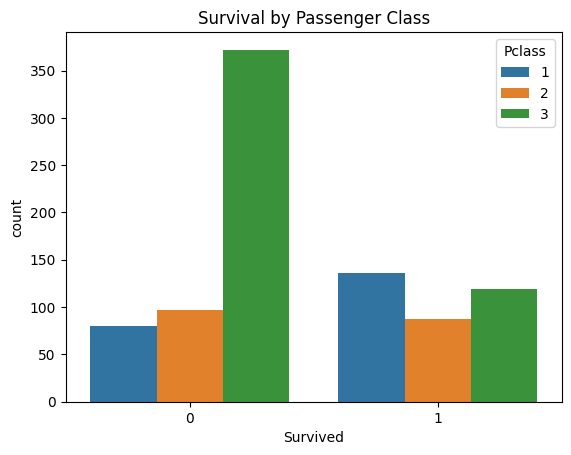

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


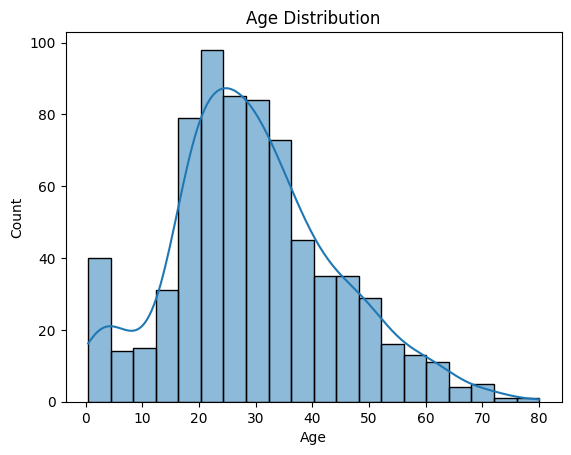

In [2]:
# Check for missing values
print("\nMissing Values in Training Data:")
print(train_data.isnull().sum())

print("\nMissing Values in Test Data:")
print(test_data.isnull().sum())

# Visualize survival count
sns.countplot(x='Survived', data=train_data)
plt.title('Survival Count')
plt.show()

# Visualize survival by gender
sns.countplot(x='Survived', hue='Sex', data=train_data)
plt.title('Survival by Gender')
plt.show()

# Visualize survival by passenger class
sns.countplot(x='Survived', hue='Pclass', data=train_data)
plt.title('Survival by Passenger Class')
plt.show()

# Visualize age distribution
sns.histplot(train_data['Age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.show()

# Data Preprocessing

In [3]:
# Handle missing values
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])
train_data['Fare'] = train_data['Fare'].fillna(train_data['Fare'].median())

test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())
test_data['Embarked'] = test_data['Embarked'].fillna(test_data['Embarked'].mode()[0])

# Encode categorical variables using pd.factorize()
train_data['Sex'], _ = pd.factorize(train_data['Sex'])
train_data['Embarked'], _ = pd.factorize(train_data['Embarked'])

test_data['Sex'], _ = pd.factorize(test_data['Sex'])
test_data['Embarked'], _ = pd.factorize(test_data['Embarked'])

# Select features and target
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = train_data[features]
y = train_data['Survived']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Model Training

In [4]:
# Logistic Regression
print("\nTraining Logistic Regression Model...")
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Evaluate Logistic Regression
y_pred_log_reg = log_reg.predict(X_val)
print(f'Logistic Regression Validation Accuracy: {accuracy_score(y_val, y_pred_log_reg)}')

# Random Forest Classifier
print("\nTraining Random Forest Model...")
rf = RandomForestClassifier(random_state=42)

# Hyperparameter Tuning for Random Forest (Optional for A-level work)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best Random Forest model
best_rf = grid_search.best_estimator_
print(f'Best Random Forest Parameters: {grid_search.best_params_}')

# Evaluate Random Forest
y_pred_rf = best_rf.predict(X_val)
print(f'Random Forest Validation Accuracy: {accuracy_score(y_val, y_pred_rf)}')



Training Logistic Regression Model...
Logistic Regression Validation Accuracy: 0.7988826815642458

Training Random Forest Model...
Best Random Forest Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Random Forest Validation Accuracy: 0.8435754189944135


# Make Predictions on Test Data

In [5]:
# Preprocess test data
X_test = test_data[features]
X_test = scaler.transform(X_test)

# Use the best model (Random Forest in this case) to make predictions
test_predictions = best_rf.predict(X_test)

# Create submission file
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': test_predictions
})
submission.to_csv('submission.csv', index=False)